# T-cell annotations by Guo et al., EG36

Sample description:
- Easigenomics dataset
- Aplastic anemia
- follow up
- BM blasts = 0 %

### Reference:
Guo, X., Zhang, Y., Zheng, L., Zheng, C., Song, J., Zhang, Q., Kang, B., Liu, Z., Jin, L., Xing, R., Gao, R., Zhang, L., Dong, M., Hu, X., Ren, X., Kirchhoff, D., Roider, H. G., Yan, T., & Zhang, Z. (2018). Global characterization of T cells in non-small-cell lung cancer by single-cell sequencing. Nature medicine, 24(7), 978–985. https://doi.org/10.1038/s41591-018-0045-3


- naive_markers = ["TCF7", "SELL (CD62L)", "LEF1", "CCR7(CD197)"]
- cytotoxic_markers= ["IL2", "GZMK", "IFNG", "GZMA", "GZMB", "GZMM", "GZMH", "PRF1", "GNLY", "NCAM1(CD56)"]
- inhibitory_markers= ["LAG3(CD223)", "TIGIT", "PDCD1(CD279)", "HAVCR2(CD366)", "CTLA4(CD152)"]
- costimulatory_markers=[ "CD28", "TNFRSF14(CD270)", "ICOS", "TNFRSF9"]
- tf_markers = ["EOMES", "HOPX",  "TBX21", "ZEB2", "ZNF683", "HIF1A", "ID2", "TOX", "ZBTB16"]
- treg_markers= ["IL2RA(CD25)", "FOXP3", "LAG3(CD223)", "IKZF2"]
- memory_markers= ["CD27", "KLRG1", "B3GAT1", "IL2RA(CD25)"]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')


Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#all datasets
adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [3]:
#select sample

adata=adata[adata.obs['eg_code'] == 'EG36']

In [4]:
adata1=adata[adata.obs['cell_type'] == 'NKT']

In [5]:
adata1

View of AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [6]:
adata1.obs.index

Index(['AAACCTGAGCTGAACG-1-107', 'AAACCTGAGGTGGGTT-1-107',
       'AAACCTGGTATATCCG-1-107', 'AAACCTGGTCACACGC-1-107',
       'AAACCTGGTCCAGTGC-1-107', 'AAACCTGTCACGAAGG-1-107',
       'AAACGGGAGGCCCTCA-1-107', 'AAACGGGAGGGTATCG-1-107',
       'AAACGGGCACACATGT-1-107', 'AAACGGGGTACTCAAC-1-107',
       ...
       'TTTGCGCCAAATACAG-1-107', 'TTTGCGCGTAAATACG-1-107',
       'TTTGCGCGTAGGGACT-1-107', 'TTTGGTTCATTAGGCT-1-107',
       'TTTGGTTGTGATGATA-1-107', 'TTTGGTTTCACGCGGT-1-107',
       'TTTGGTTTCTGTCAAG-1-107', 'TTTGTCAAGTCGTTTG-1-107',
       'TTTGTCATCAGTACGT-1-107', 'TTTGTCATCGCCTGAG-1-107'],
      dtype='object', length=1585)

In [7]:
adata1

View of AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [8]:
adata1.var_names

Index(['FAM41C', 'NOC2L', 'ISG15', 'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       'ACAP3', 'PUSL1', 'AURKAIP1',
       ...
       'IKBKG', 'GAB3', 'DKC1', 'MPP1', 'F8A1', 'FUNDC2', 'BRCC3', 'VBP1',
       'TMLHE', 'VAMP7'],
      dtype='object', length=8051)

## T-cell markers by Guo et al. 2018

Guo, X., Zhang, Y., Zheng, L., Zheng, C., Song, J., Zhang, Q., Kang, B., Liu, Z., Jin, L., Xing, R., Gao, R., Zhang, L., Dong, M., Hu, X., Ren, X., Kirchhoff, D., Roider, H. G., Yan, T., & Zhang, Z. (2018). Global characterization of T cells in non-small-cell lung cancer by single-cell sequencing. Nature medicine, 24(7), 978–985. https://doi.org/10.1038/s41591-018-0045-3


In [9]:
## Guo et al., Nat Med 2018

naive_markers = ["TCF7", "SELL", "LEF1", "CCR7"]
cytotoxic_markers= ["IL2", "GZMK", "IFNG", "GZMA", "GZMB", "GZMM", "GZMH", "PRF1", "GNLY", "NCAM1"]
inhibitory_markers= ["LAG3", "TIGIT", "PDCD1", "HAVCR2", "CTLA4"]
costimulatory_markers=[ "CD28", "TNFRSF14", "ICOS", "TNFRSF9"]
tf_markers = ["EOMES", "HOPX",  "TBX21", "ZEB2", "ZNF683", "HIF1A", "ID2", "TOX", "ZBTB16"]
treg_markers= ["IL2RA", "FOXP3", "LAG3", "IKZF2"]
memory_markers= ["CD27", "KLRG1", "B3GAT1", "IL2RA"]
guo_markers =[naive_markers, cytotoxic_markers, inhibitory_markers,costimulatory_markers, tf_markers, treg_markers, memory_markers]
guo_markers = list(np.concatenate(guo_markers).flat)

In [11]:
#naive markers

listOfGenes=naive_markers

naive_guo=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        naive_guo.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

TCF7 Yes
SELL Yes
LEF1 Yes
CCR7 Yes
['TCF7', 'SELL', 'LEF1', 'CCR7']


In [12]:
#cytotoxic markers

listOfGenes=cytotoxic_markers

cytotoxic_guo=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        cytotoxic_guo.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

IL2 No
GZMK No
IFNG No
GZMA No
GZMB Yes
GZMM No
GZMH No
PRF1 No
GNLY No
NCAM1 No
['IL2', 'GZMK', 'IFNG', 'GZMA', 'GZMB', 'GZMM', 'GZMH', 'PRF1', 'GNLY', 'NCAM1']


In [13]:
#inhibitory markers

listOfGenes=inhibitory_markers

inhibitory_guo=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        inhibitory_guo.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

LAG3 No
TIGIT No
PDCD1 No
HAVCR2 No
CTLA4 No
['LAG3', 'TIGIT', 'PDCD1', 'HAVCR2', 'CTLA4']


In [14]:
#costimulatory_markers

listOfGenes=costimulatory_markers
costimulatory_guo=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        costimulatory_guo.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD28 No
TNFRSF14 Yes
ICOS No
TNFRSF9 No
['CD28', 'TNFRSF14', 'ICOS', 'TNFRSF9']


In [15]:
#tf markers

listOfGenes=tf_markers
tf_guo=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        tf_guo.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

EOMES No
HOPX Yes
TBX21 No
ZEB2 Yes
ZNF683 No
HIF1A Yes
ID2 Yes
TOX Yes
ZBTB16 No
['EOMES', 'HOPX', 'TBX21', 'ZEB2', 'ZNF683', 'HIF1A', 'ID2', 'TOX', 'ZBTB16']


In [16]:
#treg_markers

listOfGenes=treg_markers
treg_guo=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        treg_guo.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

IL2RA No
FOXP3 No
LAG3 No
IKZF2 Yes
['IL2RA', 'FOXP3', 'LAG3', 'IKZF2']


In [17]:
#memory_markers

listOfGenes=memory_markers
memory_guo=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        memory_guo.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD27 No
KLRG1 No
B3GAT1 No
IL2RA No
['CD27', 'KLRG1', 'B3GAT1', 'IL2RA']


In [18]:
#guo_markers

listOfGenes=guo_markers
guo_markers_all=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        guo_markers_all.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

TCF7 Yes
SELL Yes
LEF1 Yes
CCR7 Yes
IL2 No
GZMK No
IFNG No
GZMA No
GZMB Yes
GZMM No
GZMH No
PRF1 No
GNLY No
NCAM1 No
LAG3 No
TIGIT No
PDCD1 No
HAVCR2 No
CTLA4 No
CD28 No
TNFRSF14 Yes
ICOS No
TNFRSF9 No
EOMES No
HOPX Yes
TBX21 No
ZEB2 Yes
ZNF683 No
HIF1A Yes
ID2 Yes
TOX Yes
ZBTB16 No
IL2RA No
FOXP3 No
LAG3 No
IKZF2 Yes
CD27 No
KLRG1 No
B3GAT1 No
IL2RA No
['TCF7', 'SELL', 'LEF1', 'CCR7', 'IL2', 'GZMK', 'IFNG', 'GZMA', 'GZMB', 'GZMM', 'GZMH', 'PRF1', 'GNLY', 'NCAM1', 'LAG3', 'TIGIT', 'PDCD1', 'HAVCR2', 'CTLA4', 'CD28', 'TNFRSF14', 'ICOS', 'TNFRSF9', 'EOMES', 'HOPX', 'TBX21', 'ZEB2', 'ZNF683', 'HIF1A', 'ID2', 'TOX', 'ZBTB16', 'IL2RA', 'FOXP3', 'LAG3', 'IKZF2', 'CD27', 'KLRG1', 'B3GAT1', 'IL2RA']


In [19]:
sc.settings.set_figure_params(dpi=300)

In [20]:
#Markers found on our var.names:

#naive_guo 
#cytotoxic_guo
#inhibitory_guo (none in our var.names)
#costimulatory_guo
#tf_guo
#treg_guo
#memory_guo (none in our var.names)

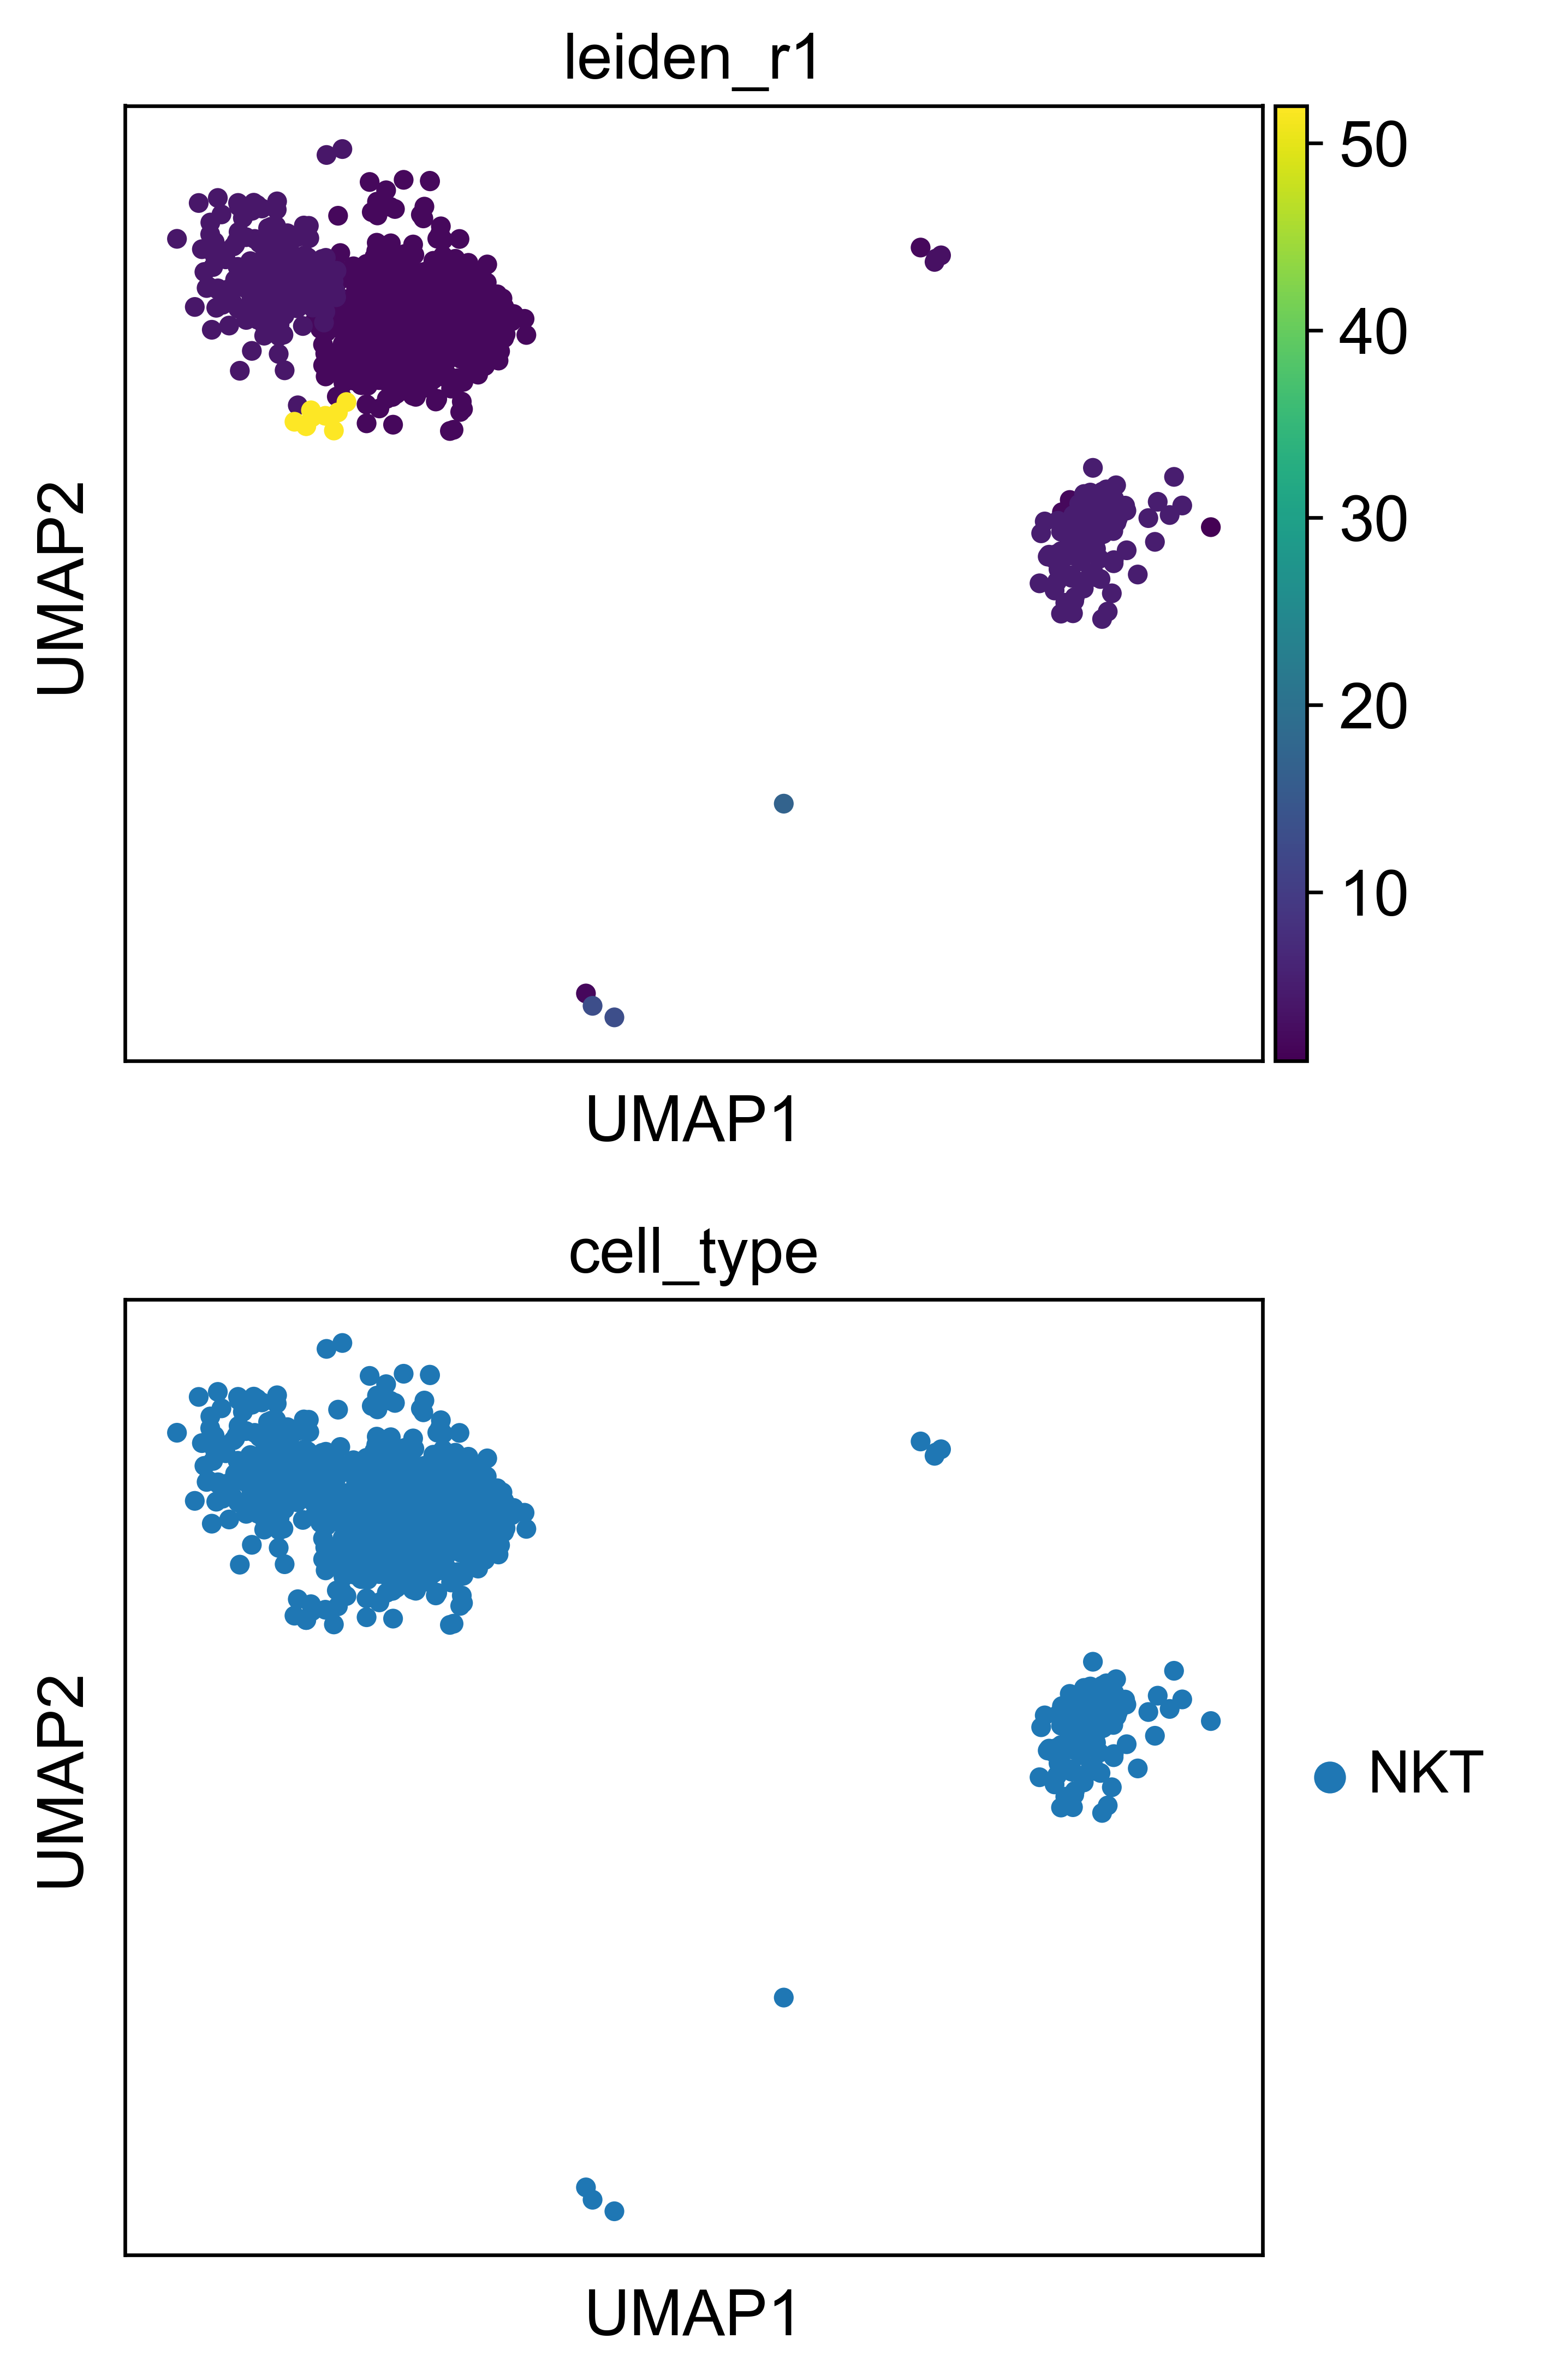

In [21]:
sc.pl.umap(adata1, color = ['leiden_r1', 'cell_type'], color_map = 'viridis', ncols = 1)

In [22]:
#All T-cell markers by Guo et al. 

sc.pl.umap(adata1, color = guo_markers_all , color_map = 'viridis', ncols = 2)

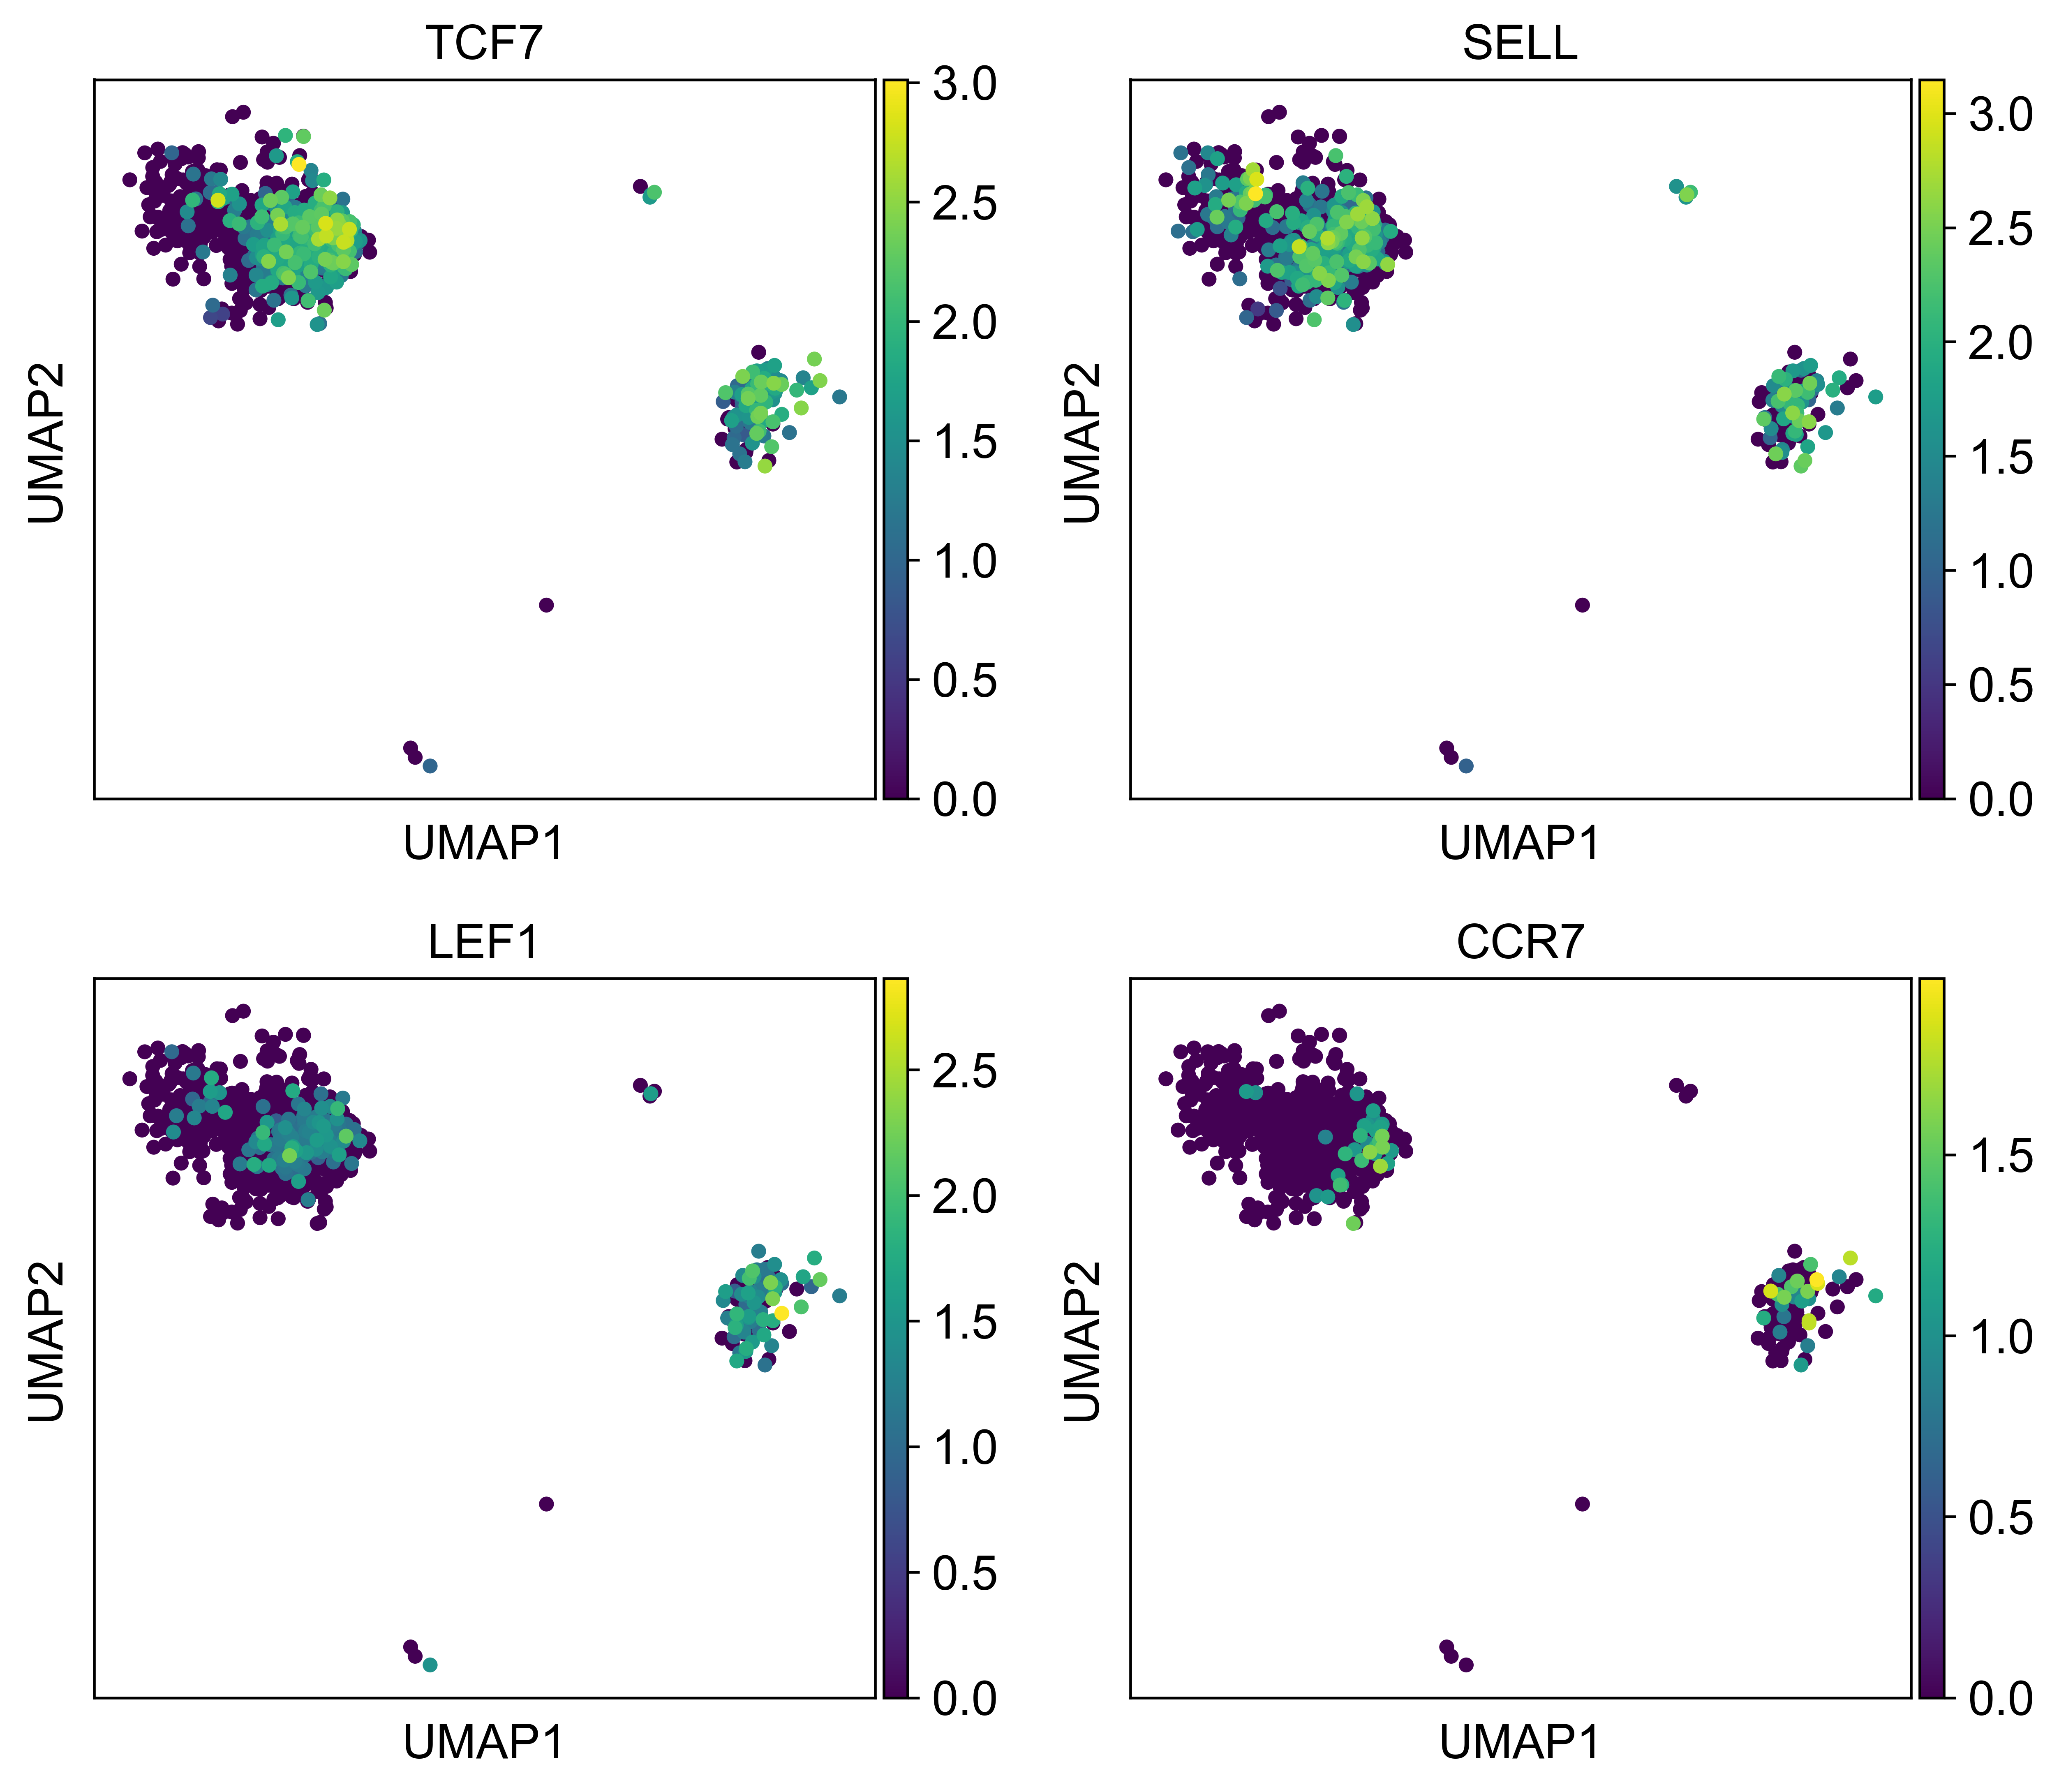

In [23]:
#naive T-cell markers

sc.pl.umap(adata1, color = naive_markers , color_map = 'viridis', ncols = 2)

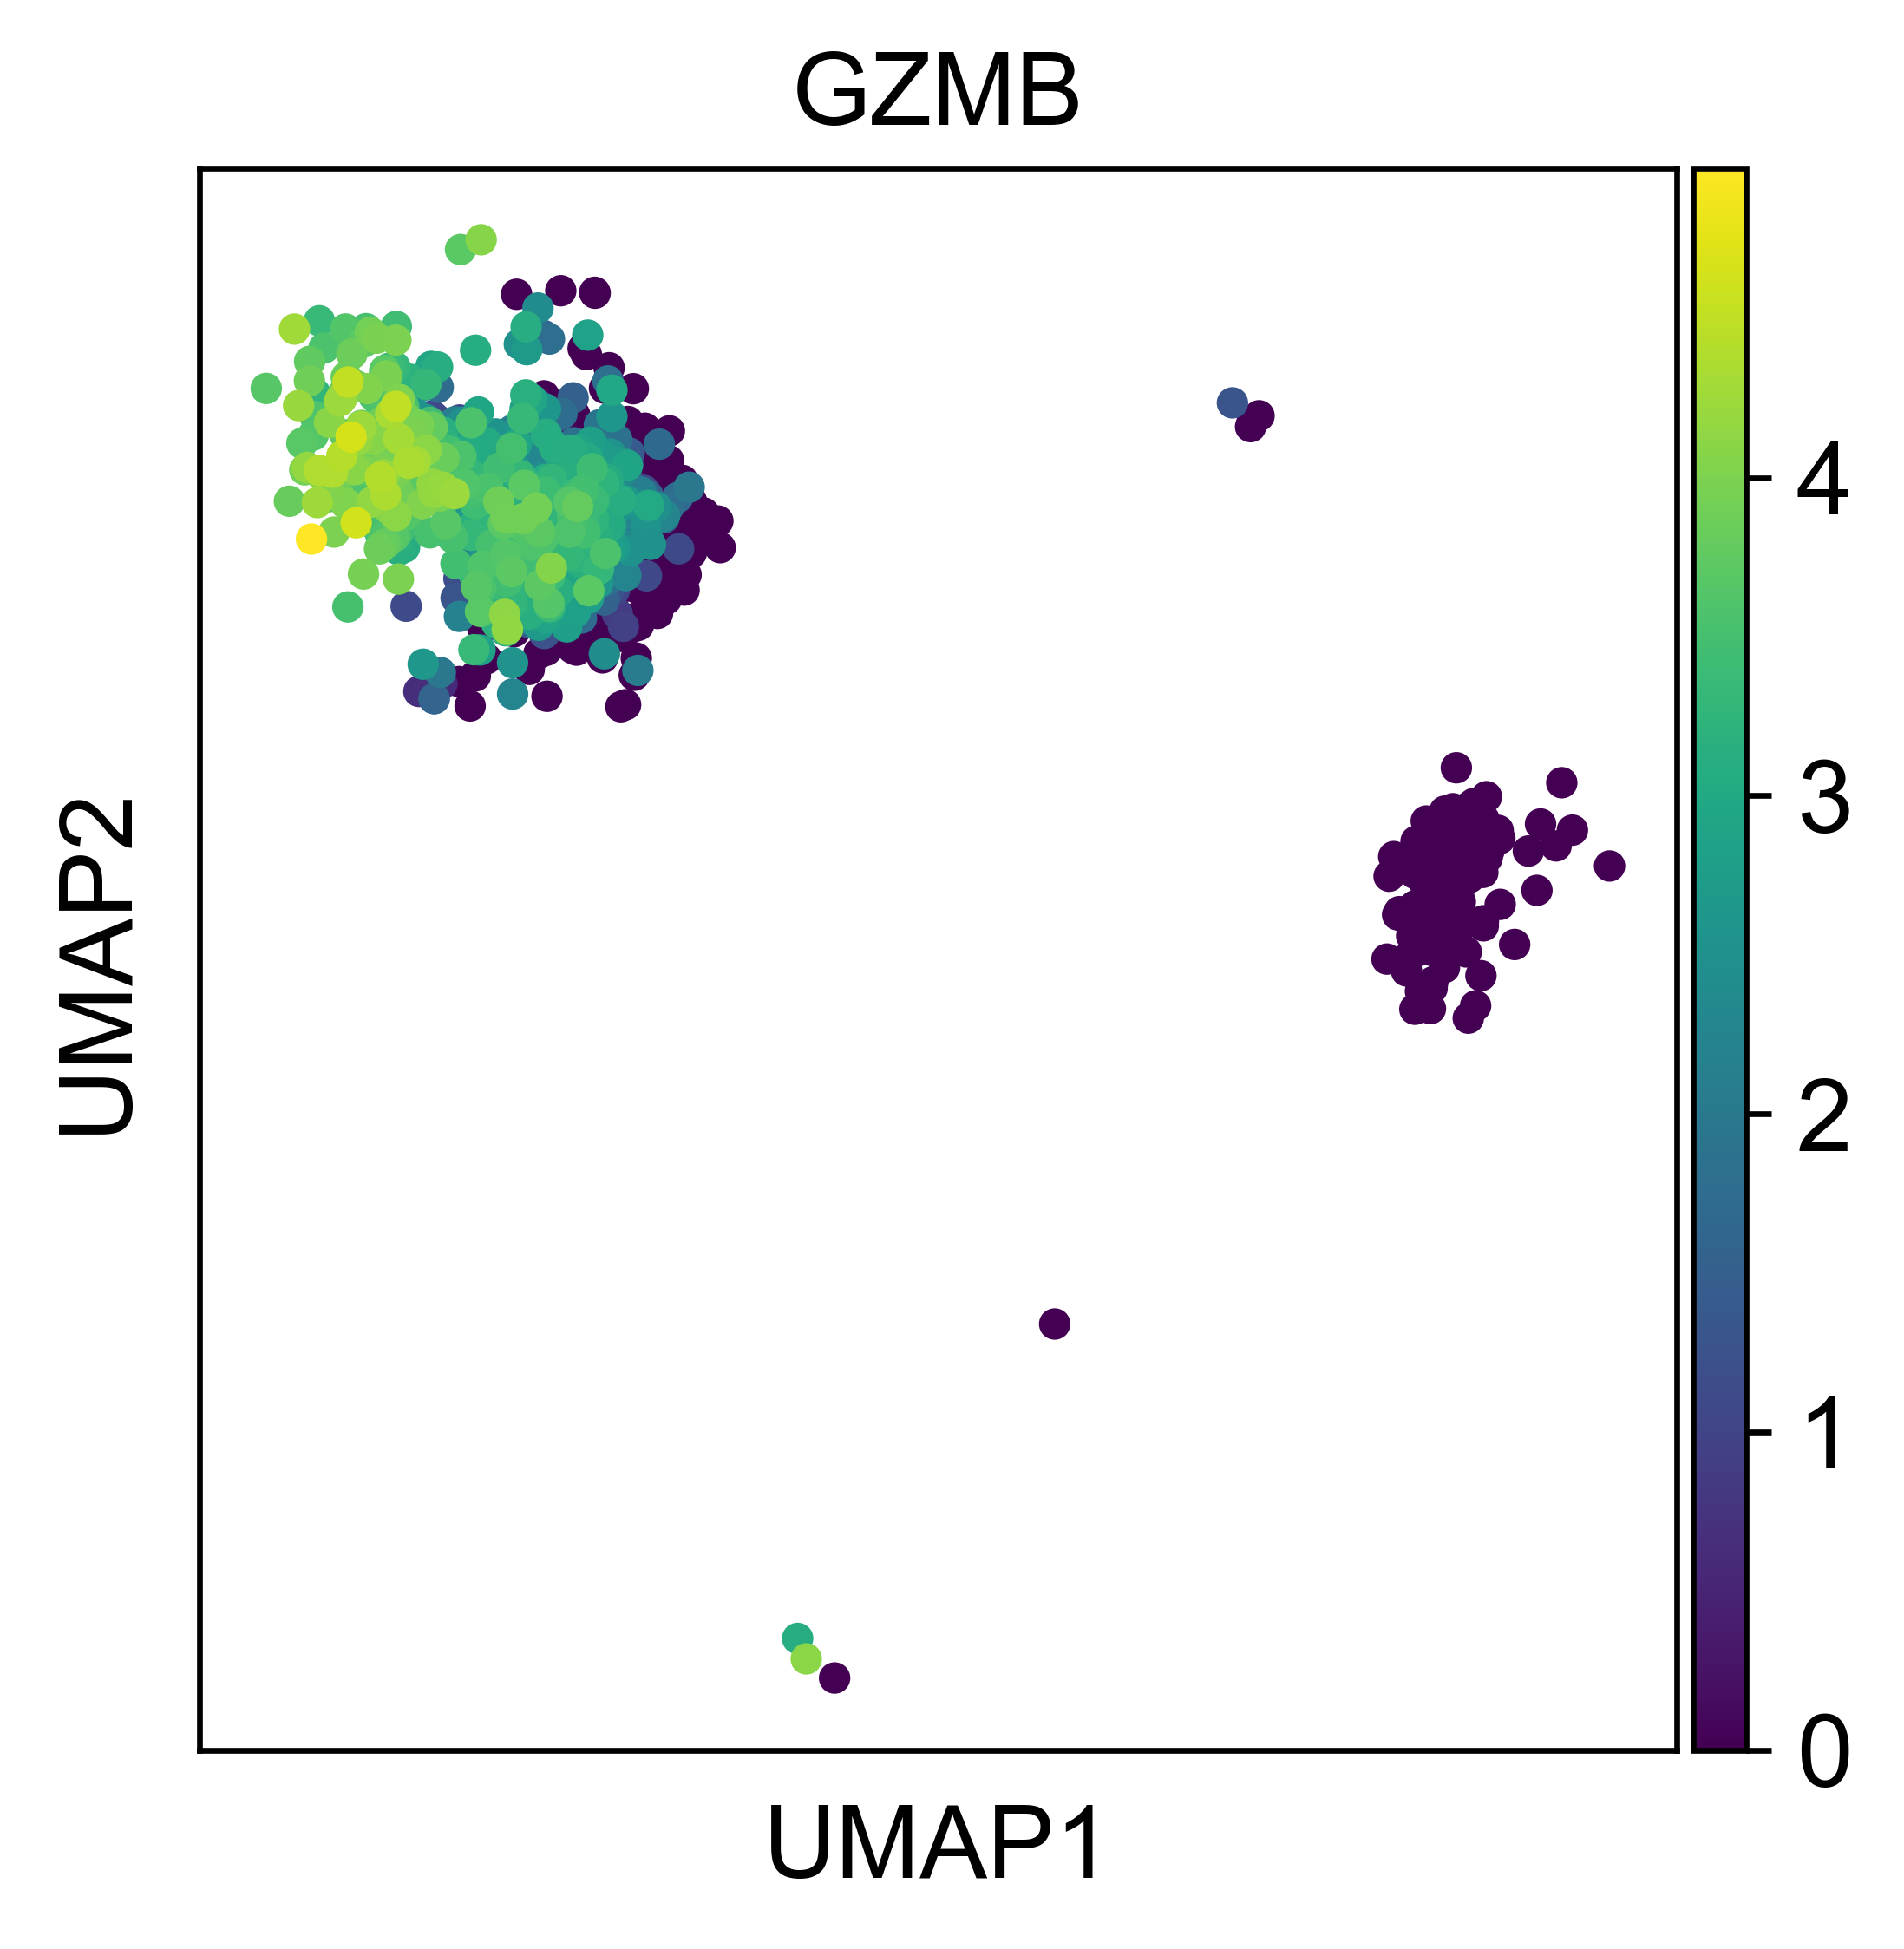

In [24]:
#cytotoxic markers

sc.pl.umap(adata1, color = cytotoxic_guo , color_map = 'viridis', ncols = 2)

In [25]:
#Not inhibitory markers in our var.names
inhibitory_guo

[]

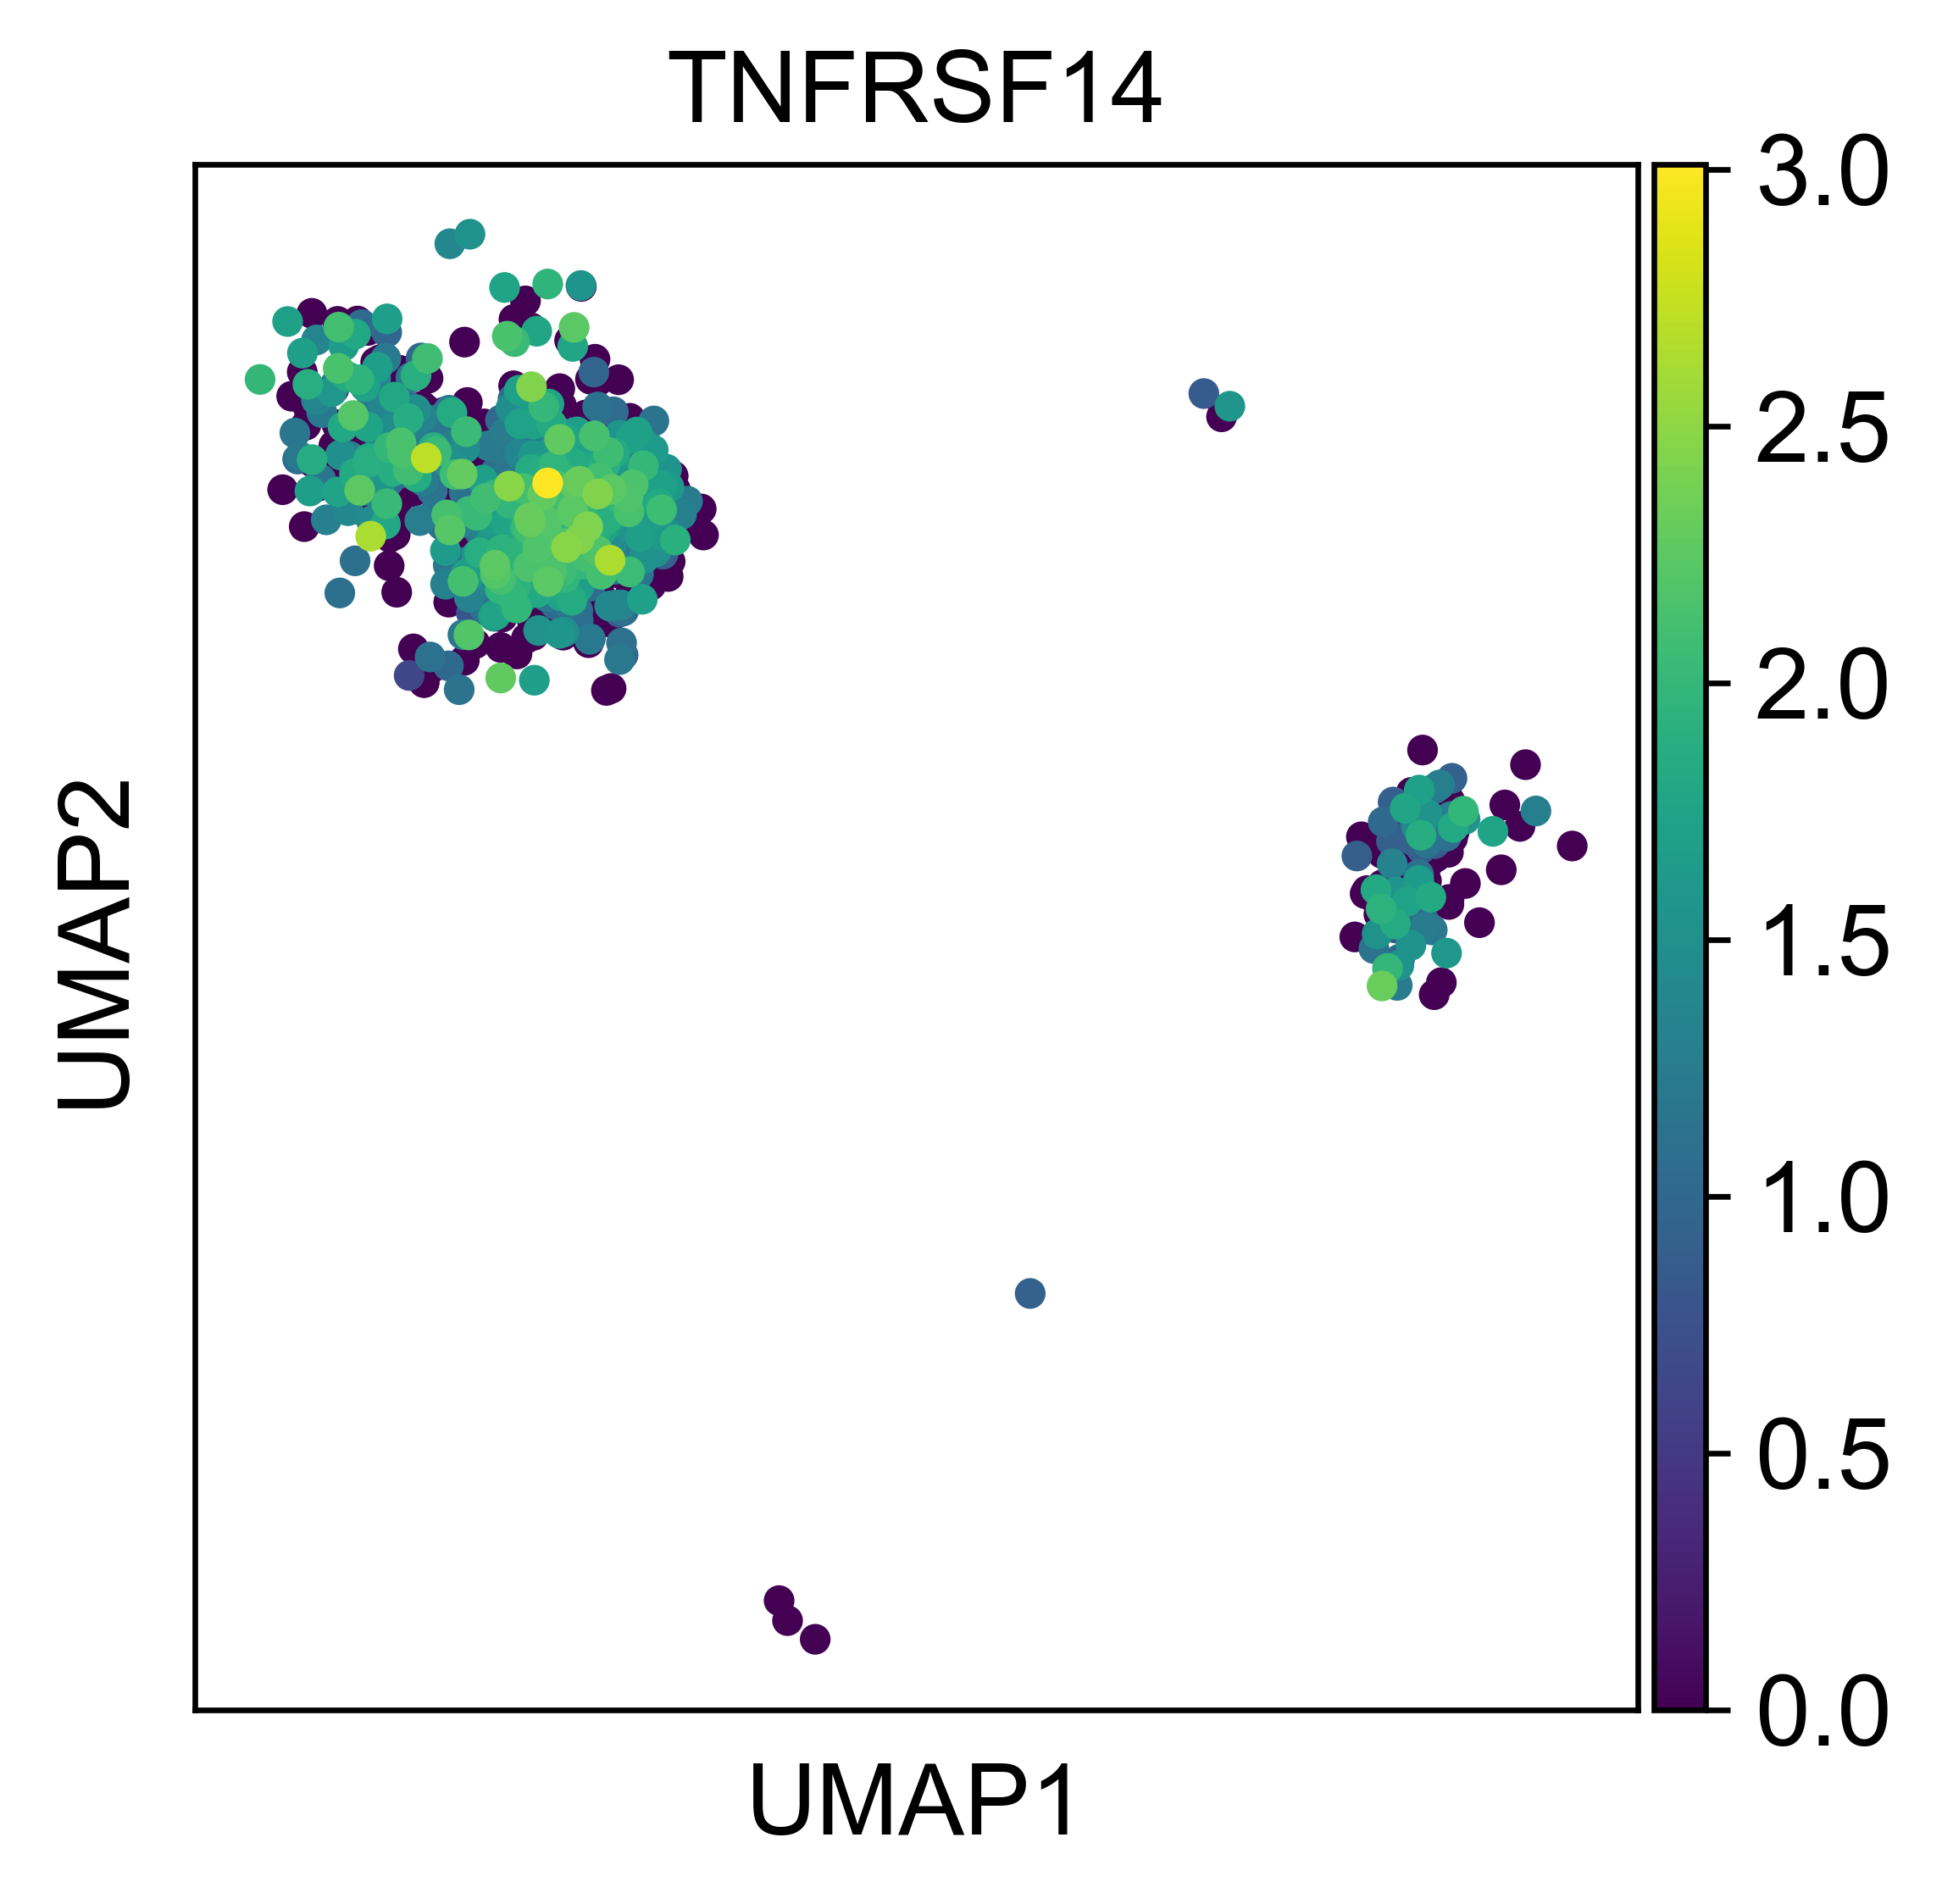

In [26]:
#Costimulatory

sc.pl.umap(adata1, color = costimulatory_guo , color_map = 'viridis', ncols = 2)

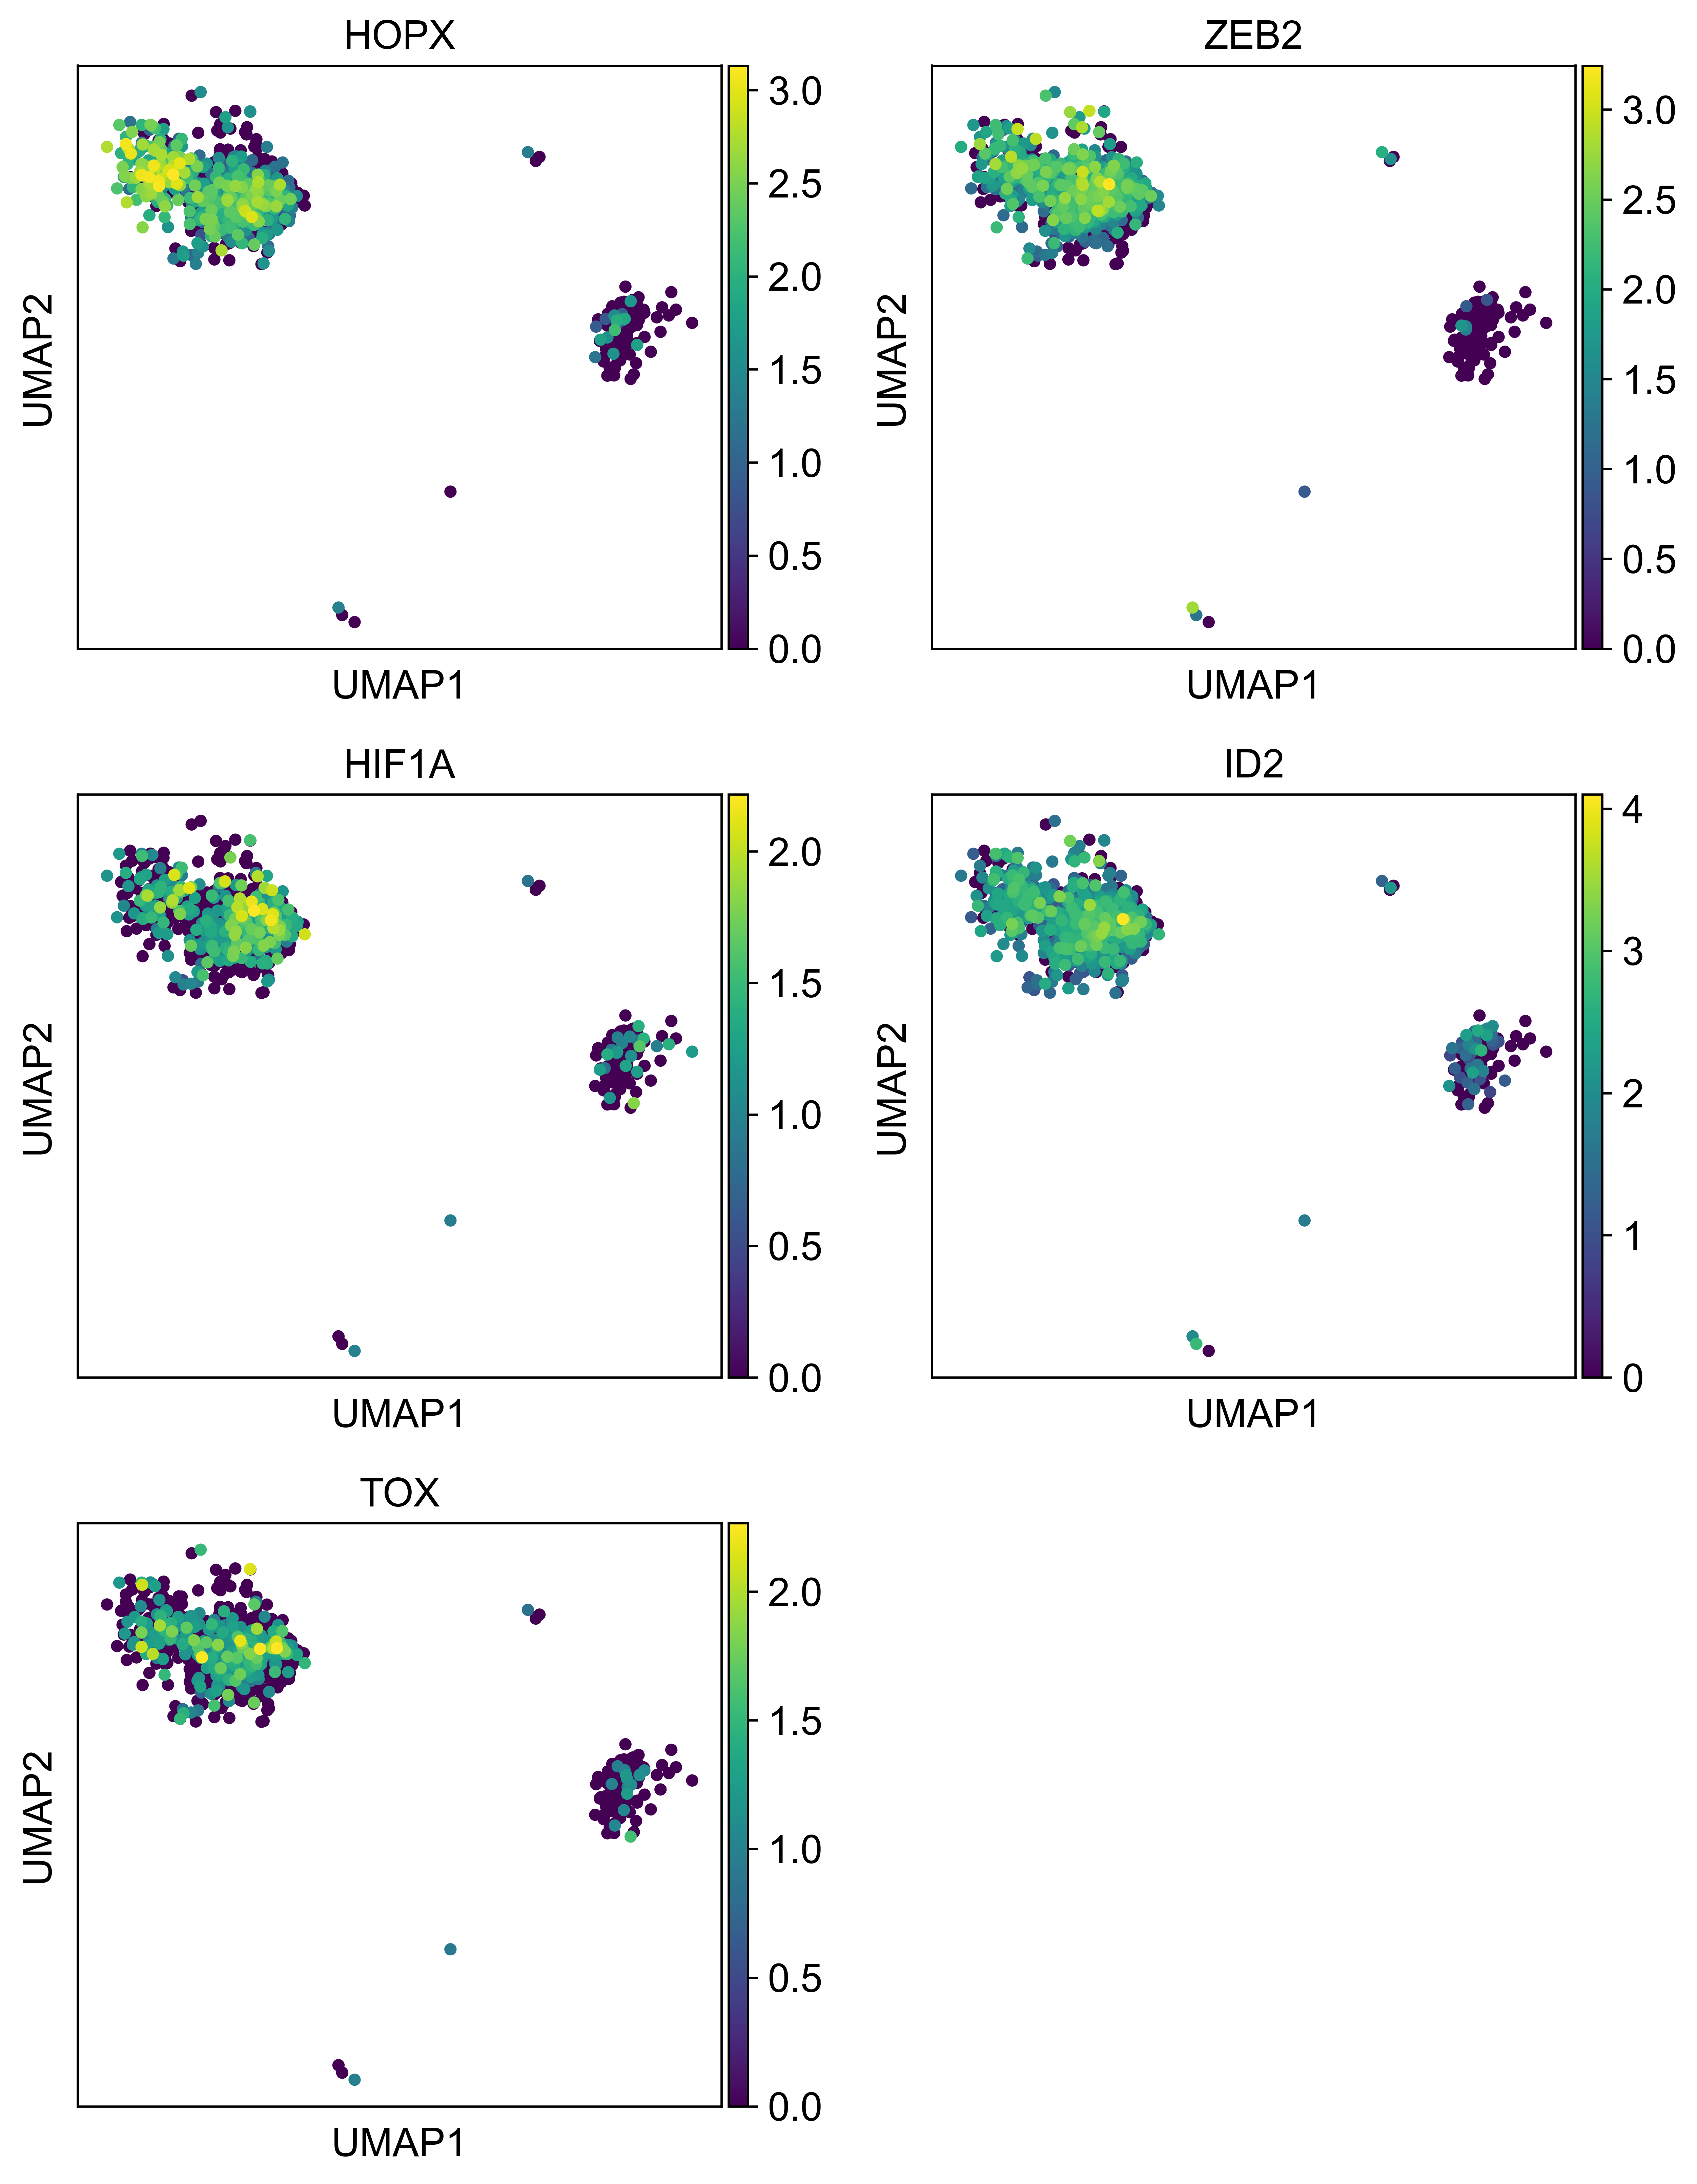

In [27]:
#tf_guo

sc.pl.umap(adata1, color = tf_guo , color_map = 'viridis', ncols = 2)

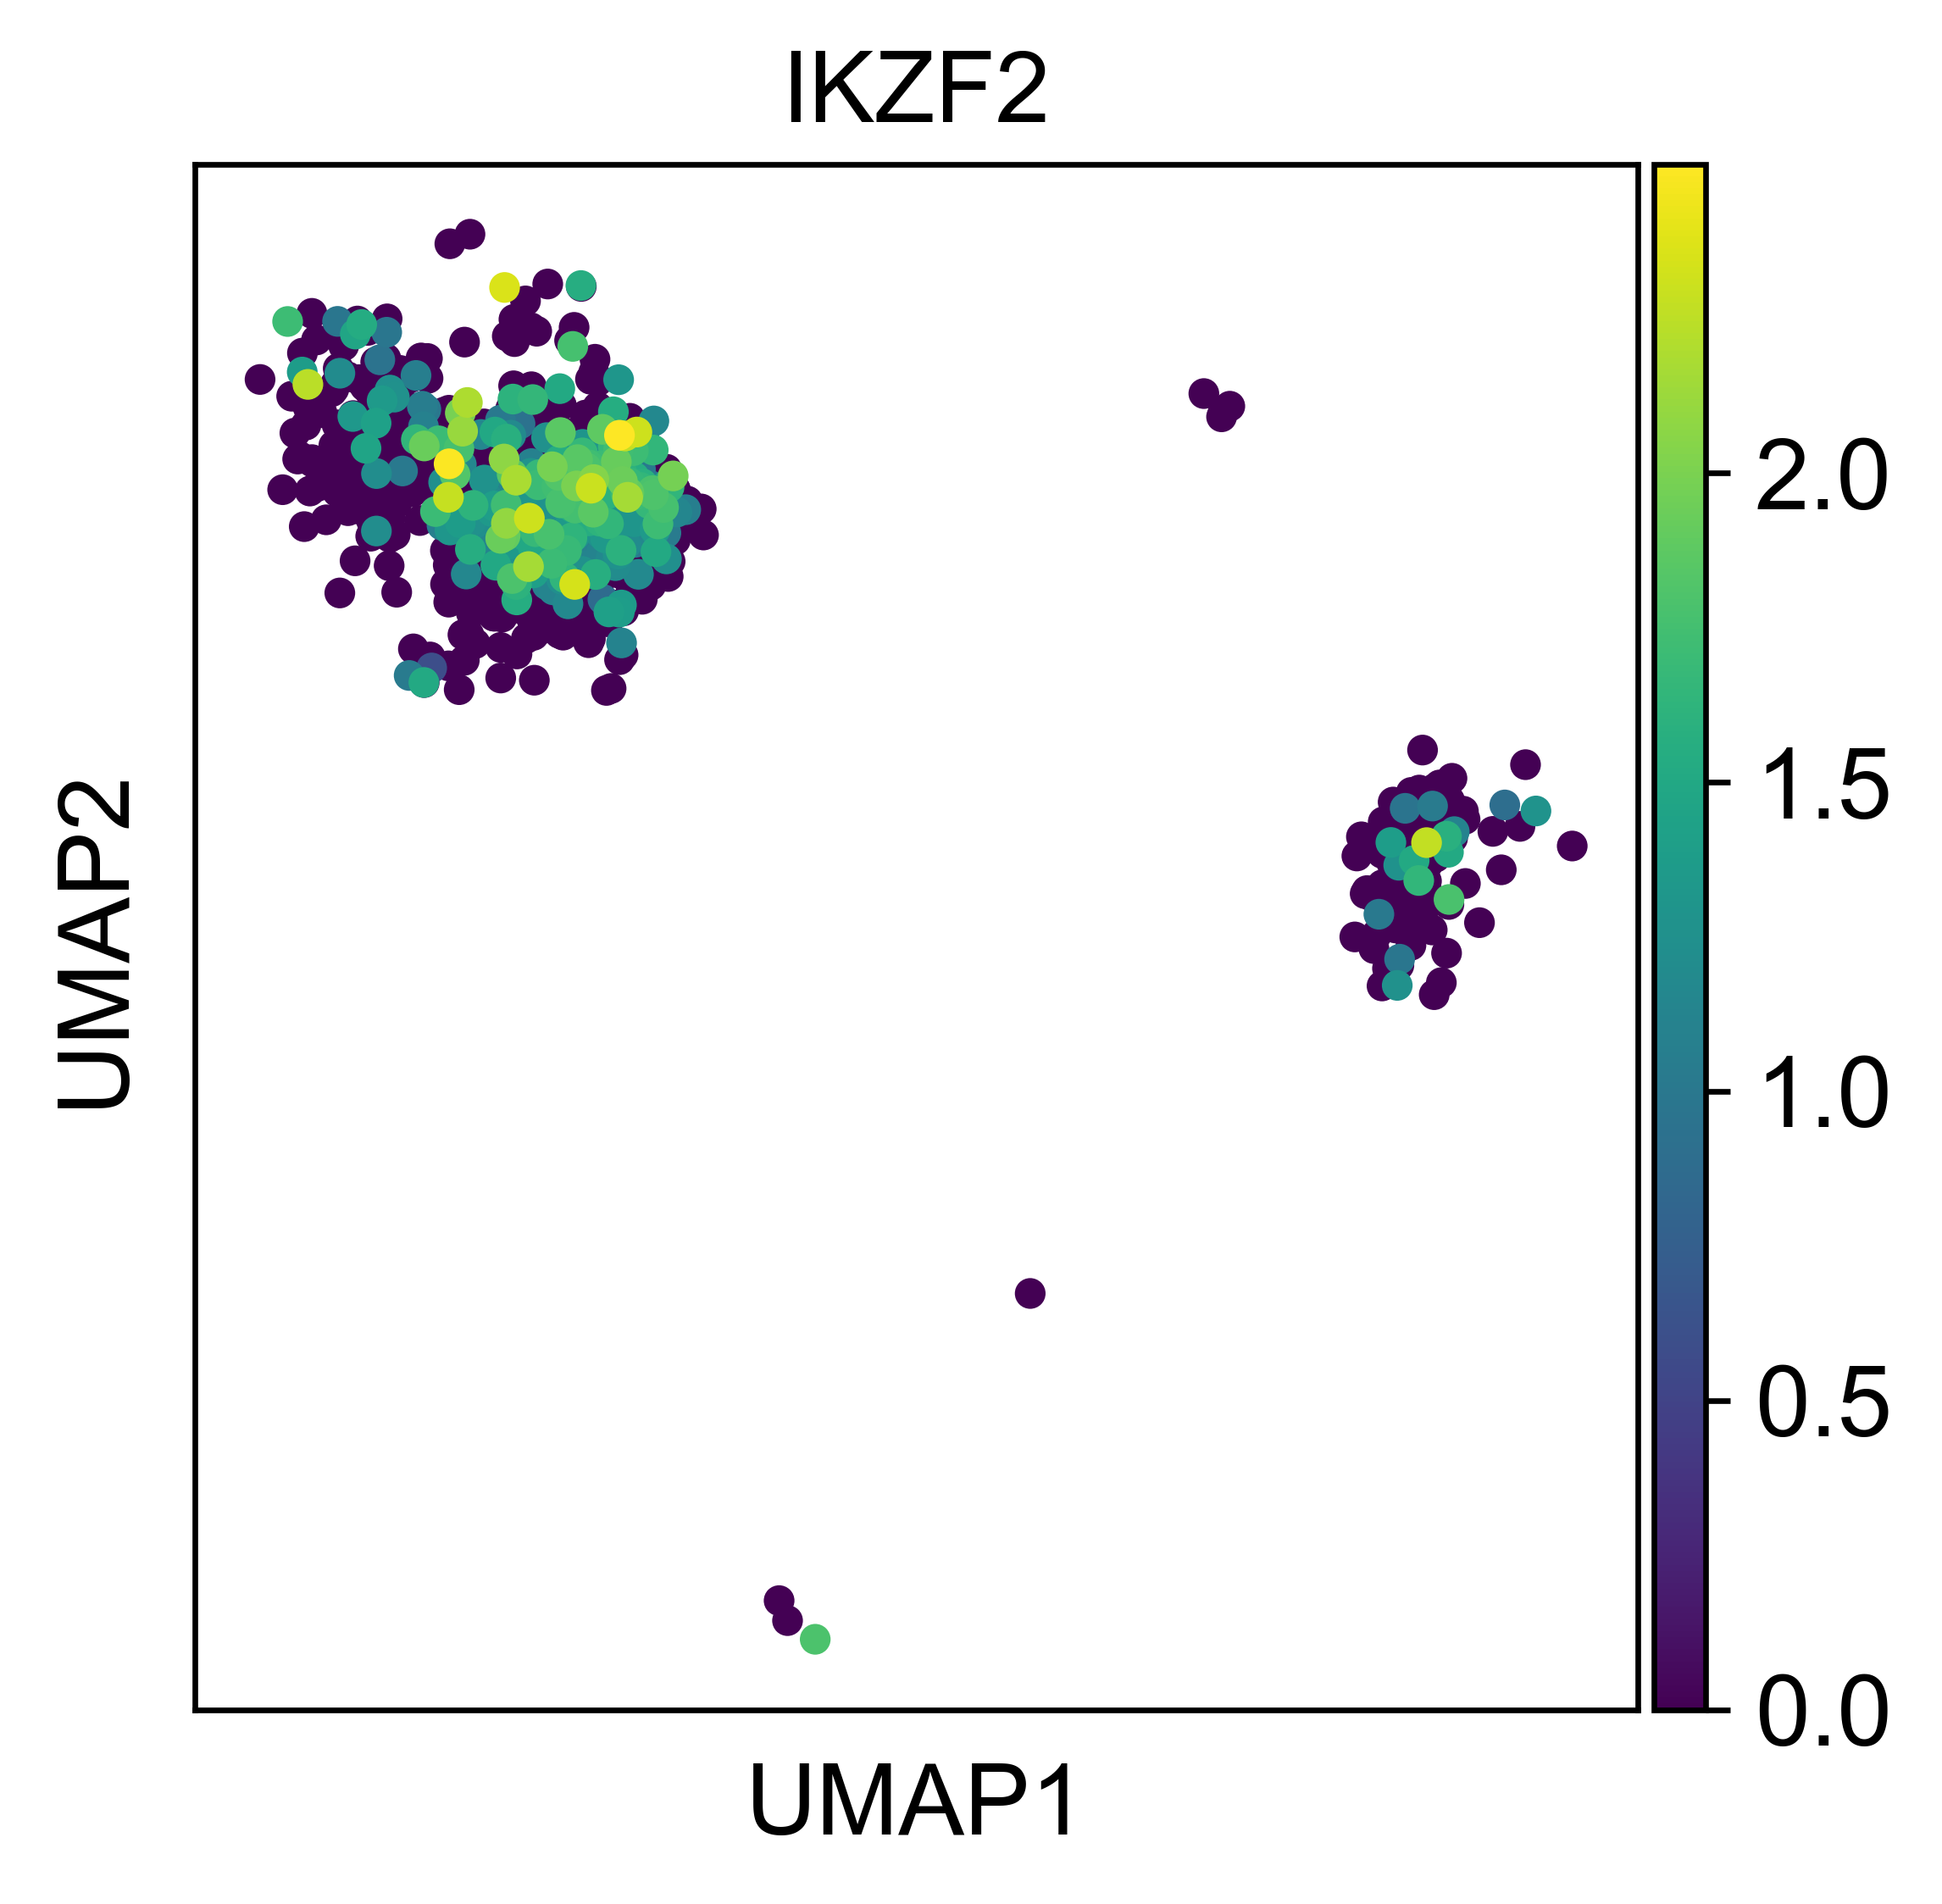

In [28]:
#T-regulatory

sc.pl.umap(adata1, color = treg_guo , color_map = 'viridis', ncols = 2)

In [29]:
#no markers for memory T-cells in our var.names

memory_guo

[]

In [30]:
adata

View of AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [31]:
sc.settings.set_figure_params(dpi=100)

In [32]:
#naive_guo 
#cytotoxic_guo
#inhibitory_guo (none in our var.names)
#costimulatory_guo
#tf_guo
#treg_guo
#memory_guo (none in our var.names)

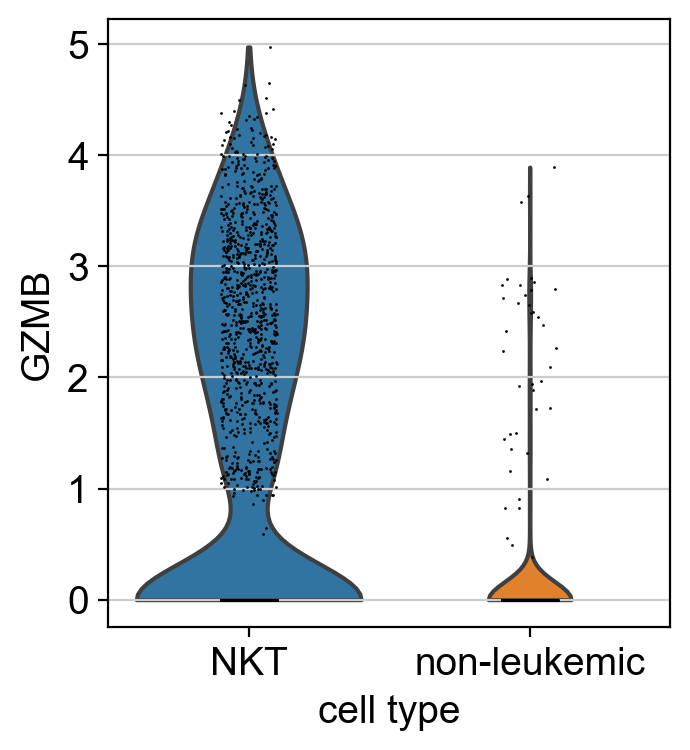

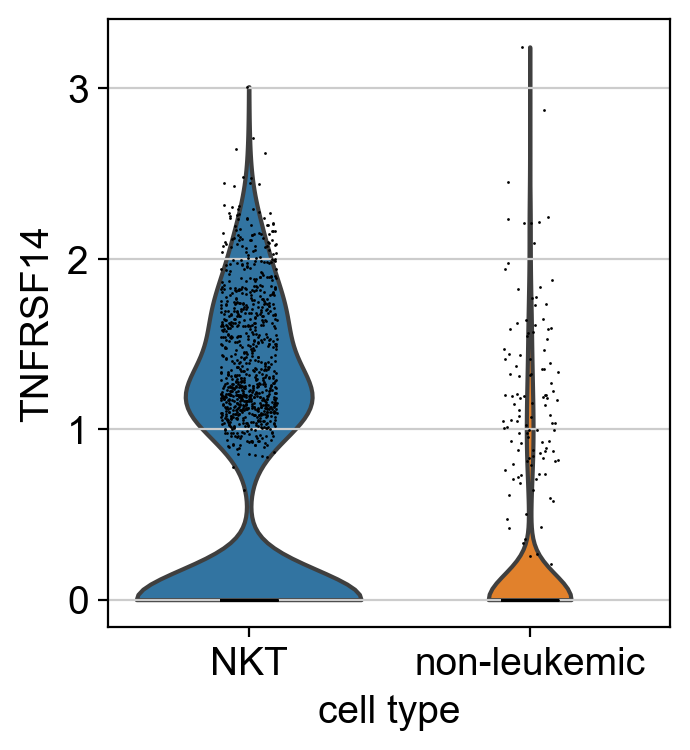

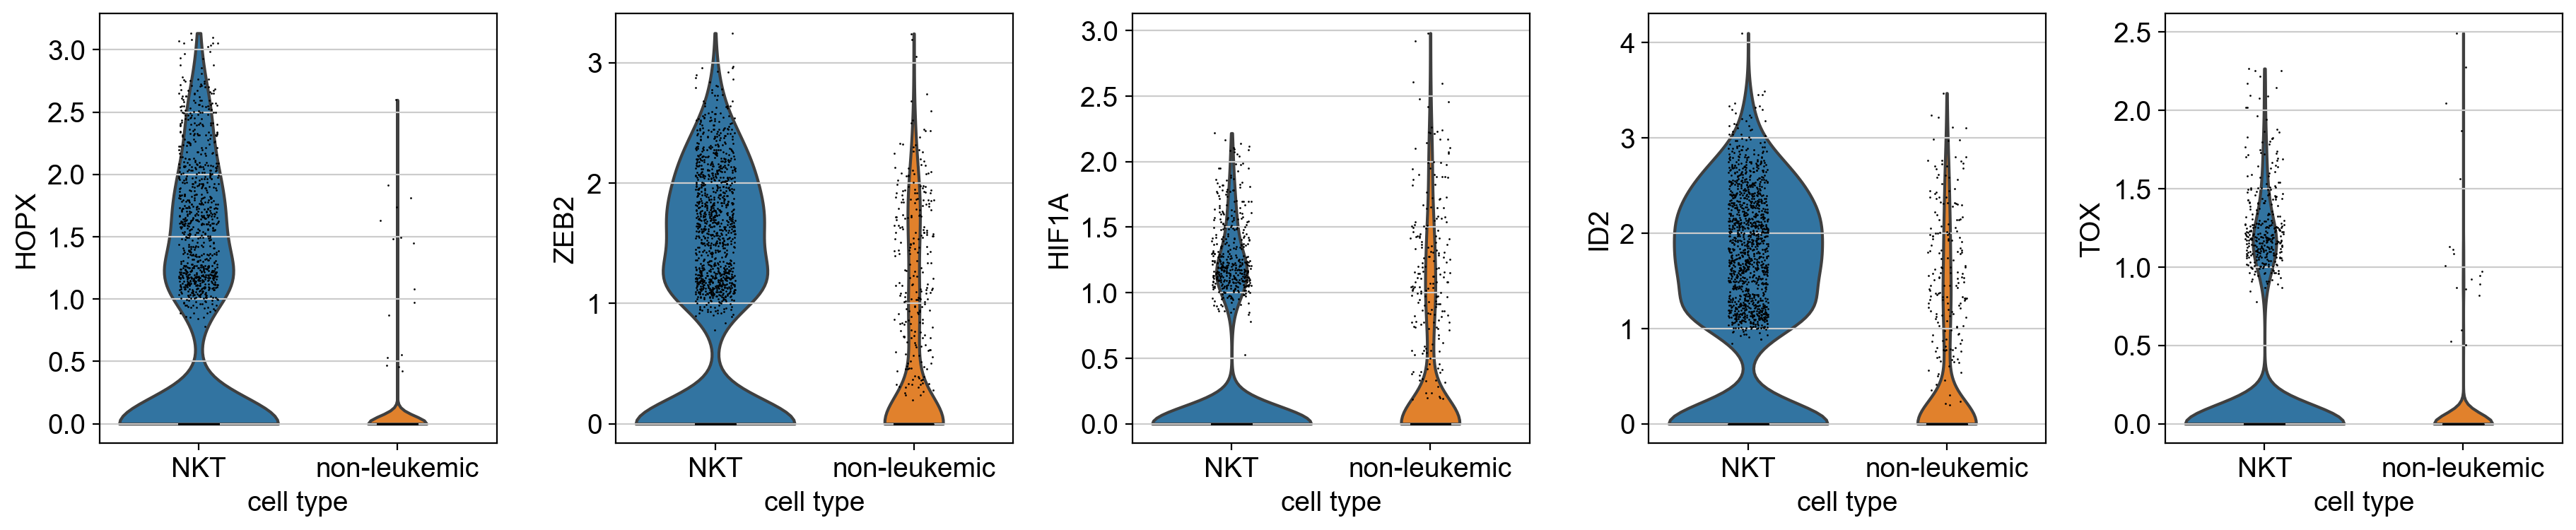

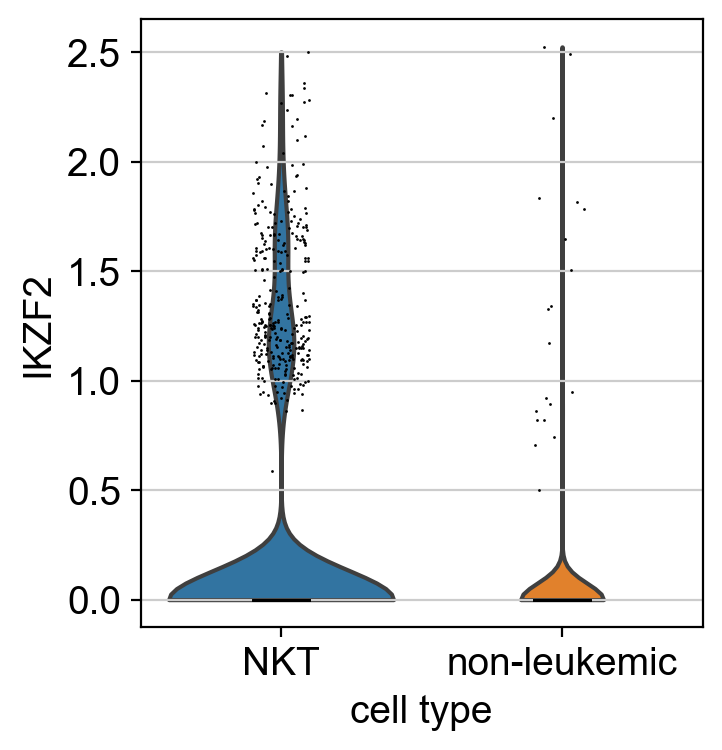

In [33]:
#Naive marker

#sc.pl.violin(adata, keys= naive_guo, groupby= 'cell_type', scale = 'count')
#Error arises: ZeroDivisionError: float division by zero

#Cytotoxic marker

sc.pl.violin(adata, keys= cytotoxic_guo, groupby= 'cell_type', scale = 'count')

#Costimulatory

sc.pl.violin(adata, keys= costimulatory_guo, groupby= 'cell_type', scale = 'count' )

#Tf_guo

sc.pl.violin(adata, keys= tf_guo, groupby= 'cell_type', scale = 'count' )


#Treg_guo

sc.pl.violin(adata, keys= treg_guo, groupby= 'cell_type', scale = 'count' )